In [37]:
import pandas as pd
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob

# Load Dataset
file_path = '/content/blogs.csv'
data = pd.read_csv(file_path)


In [ ]:
# Check Data Structure
print(data.head())
print(data.info())


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [ ]:
# Unique Categories
print("Unique Categories:", data['Labels'].unique())


Unique Categories: ['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']


In [46]:
# Download necessary NLTK resources
!pip install nltk

In [69]:
import nltk
import shutil
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stop_words')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Error loading stop_words: Package 'stop_words' not found
[nltk_data]     in index


False

In [64]:
from nltk.tokenize import word_tokenize
from nltk.data import find

try:
    find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


In [65]:
print(nltk.data.path)
nltk.data.path.append('/usr/local/share/nltk_data')

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/usr/local/share/nltk_data', '/usr/local/share/nltk_data', '/usr/local/share/nltk_data', '/usr/local/share/nltk_data', '/usr/local/share/nltk_data']


In [66]:
def preprocess_text(text):
    nltk.download('punkt_tab')  # Ensure punkt is available
    print("Preprocessing text:", text[:50])  # Debug print
    text = text.lower()  # Convert to lowercase
    text = text.translate(punctuation_table)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)


In [70]:
stop_words = set(stopwords.words('english'))
punctuation_table = str.maketrans('', '', string.punctuation)

In [71]:
data['Data'] = data['Data'].fillna('')  # Replace NaNs with empty strings
data['Cleaned_Data'] = data['Data'].astype(str).apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cm
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53485 
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1206
Preprocessing text: Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cm
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1206
Preprocessing text: Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cm
Preprocessing text: Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cm
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53264 
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43556 
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1217
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cm
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53123 
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54165 
Preprocessing text: Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cm
Preprocessing text: Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cm
Preprocessing text: Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cm
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1206
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cm
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:3837
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.
Preprocessing text: Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!wup
Preprocessing text: Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:3885
Preprocessing text: Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.human-factors
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:3863
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gat
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!dar
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.os.ms-windows
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.os.ms-windows
Preprocessing text: Newsgroups: comp.os.ms-windows.misc
Path: cantalou
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.fan.bill-gates
Preprocessing text: Newsgroups: comp.os.ms-windows.misc
Path: cantalou
Preprocessing text: Newsgroups: comp.os.ms-windows.misc
Path: cantalou
Preprocessing text: Newsgroups: comp.os.ms-windows.misc
Path: cantalou
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.sys.ibm.pc.ha
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.sys.ibm.ps2.h
Prepro


[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-t

Preprocessing text: Newsgroups: comp.os.ms-windows.misc
Path: cantalou
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.databases:245
Preprocessing text: Newsgroups: comp.os.ms-windows.misc
Path: cantalou
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gat
Preprocessing text: Newsgroups: comp.os.ms-windows.misc
Path: cantalou
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.os.ms-windows
Preprocessing text: Newsgroups: comp.os.ms-windows.misc
Path: cantalou
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.fan.bill-gates
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.os.ms-windows
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro


Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gat
Preprocessing text: Newsgroups: comp.sys.ibm.pc.hardware
Path: cantalo
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.os.msdos.misc
Preprocessing text: Newsgroups: comp.sys.ibm.pc.hardware
Path: cantalo
Preprocessing text: Nntp-Posting-Host: hawaii.et.byu.edu
Lines: 15
Pat
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!bog
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.sys.ibm.pc.ha
Preprocessing text: Newsgroups: comp.sys.ibm.pc.hardware
Path: cantalo
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Newsgroups: comp.sys.ibm.pc.hardware
Path: cantalo
Preprocessing text: Newsgroups: comp.sys.ibm.pc.hardware
Path: cantalo
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.os.msdos.misc
Prepr

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Newsgroups: comp.sys.mac.hardware
Path: cantaloupe
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.hardw
Preprocessing text: Newsgroups: comp.sys.mac.hardware
Path: cantaloupe
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gat
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu rec.music.makers:3
Preprocessing text: Newsgroups: comp.sys.mac.hardware
Path: cantaloupe
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu cmu.comp.sys.mac:1
Preprocessing text: Newsgroups: comp.sys.mac.hardware
Path: cantaloupe
Preprocessing text: Path: 

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Newsgroups: comp.windows.x
Path: cantaloupe.srv.cs
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.sys.sun.wante
Preprocessing text: Newsgroups: comp.windows.x
Path: cantaloupe.srv.cs
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.unix.solaris:
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!bog
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!wup
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x:664
Preprocessing text: Newsgroups: comp.windows.x
Path: cantaloupe.srv.cs
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x:672
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Prepro

[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to

Newsgroups: comp.windows.x
Path: cantaloupe.srv.cs
Preprocessing text: Newsgroups: comp.windows.x
Path: cantaloupe.srv.cs
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x.app
Preprocessing text: Newsgroups: comp.windows.x
Path: cantaloupe.srv.cs
Preprocessing text: Newsgroups: comp.windows.x
Path: cantaloupe.srv.cs
Preprocessing text: Newsgroups: comp.windows.x
Path: cantaloupe.srv.cs
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gat
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x:672
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: comp.windows.x
Path: cantaloupe.srv.cs
Preprocessing text: Newsgroups: misc.forsale,misc.forsale.computers,mi
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.wanted:31250 
Preprocessing text: Newsgr

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Newsgroups: misc.forsale
Path: cantaloupe.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: misc.forsale
Path: cantaloupe.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.forsale:76316
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gat
Preprocessing text: From: tallen@hpcc01.corp.hp.com (Thomas C Allen)
D
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.forsale:75931
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.forsale:76811
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.forsale:76163
Preprocessing text: Newsgroups: misc.forsale
Path: cantaloupe.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.forsale:76487
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gat
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.forsale:74778
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Newsgroups: rec.autos
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu rec.autos:103221 r
Preprocessing text: Newsgroups: rec.autos
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu rec.autos.vw:14054
Preprocessing text: Newsgroups: rec.autos
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: rec.autos
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: rec.autos
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: rec.autos,chi.general
Path: cantaloupe
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu rec.autos:103517 m
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: rec.autos
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.parents-teens:
Preprocessing text: Newsgroups: rec.autos
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgr

[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to

Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu rec.motorcycles:10
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!cornell!
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu rec.motorcycles:10
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu rec.motorcycles:10
Preprocessing text: Newsgroups: rec.motorcycles,ba.motorcycles
Path: c
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Newsgroups: rec.motorcycles
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Newsgr

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!bog
Preprocessing text: Newsgroups: rec.sport.baseball
Path: cantaloupe.sr
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: rec.sport.baseball
Path: cantaloupe.sr
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!cornell!
Preprocessing text: Newsgroups: rec.sport.baseball
Path: cantaloupe.sr
Preprocessing text: Newsgroups: rec.sport.baseball
Path: cantaloupe.sr
Preprocessing text: Newsgroups: rec.sport.baseball
Path: cantaloupe.sr
Preprocessing text: Newsgroups: rec.sport.baseball
Path: cantaloupe.sr
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: rec.sport.baseball
Path: cantaloupe.sr
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: 

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro


Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Newsgroups: rec.sport.hockey
Path: cantaloupe.srv.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Newsgroups: rec.sport.hockey
Path: cantaloupe.srv.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: rec.sport.hockey
Path: cantaloupe.srv.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: rec.sport.hockey,edm.general
Path: can
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: rec.sport.hockey
Path: cantaloupe.srv.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Prepr

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro


Preprocessing text: Newsgroups: rec.sport.hockey
Path: cantaloupe.srv.
Preprocessing text: Newsgroups: rec.sport.hockey
Path: cantaloupe.srv.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu comp.org.eff.talk:
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:15955 al
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:15734 al
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.privacy:6589 s
Prepr

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:15597 al
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: sci.crypt
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.security:9968 
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:15681 co
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.privacy.clippe
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:15602 co
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:15383 al
Preprocessing text: Newsgroups: sci.crypt,alt.privacy.clipper
Path: ca
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:15368 al
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Newsgroups: sci.electronics
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu rec.music.marketpl
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: sci.electronics
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.electronics:52
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.culture.usa:13
Preprocessing text: Newsgroups: sci.electronics
Path: cantaloupe.srv.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: sci.electronics
Path: cantaloupe.srv.c
Preprocessing text: Xref: 

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.med:58963 sci.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.consumers:677
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.med:58568 sci.
Preprocessing text: Newsgroups: sci.med
Path: cantaloupe.srv.cs.cmu.ed
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.med:59105 rec.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: sci.med
Path: cantaloupe.srv.cs.cmu.ed
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.med:58827 sci.
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: sci.med
Path: cantaloupe.srv.cs.cmu.ed
Preprocessing text: Newsgroups: sci.med
Path: cantaloupe.srv.cs.cmu.ed
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: sci.med
Path: cantaloupe.srv.cs.cmu.ed
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.consumers:677
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!bog
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!bog
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: sci.med
Path: cantaloupe.srv.cs.cmu.ed
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Prepro


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /r

Preprocessing text: Newsgroups: sci.space
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: sci.space
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: sci.space
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: sci.space
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: sci.space
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Newsgroups: sci.space
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!lou
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.space:60964 sc
Preprocessing text: Newsgroups: sci.space
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.space:61396 sc
Preprocessing text: Newsgroups: sci.space
Path: cantaloupe.srv.cs.cmu.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu sci.space:62116 sc
Prepro

[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to

Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.religion.chris
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.religion.chris
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!news.bbn
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!bog
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.religion.chris
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.religion.chris
Prepro

[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to

Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.religion.chris
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!rutgers!
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!dar
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!news.bbn
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!dar
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.religion.chris
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.conspiracy:219
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: talk.politics.guns
Path: cantaloupe.sr
Preprocessing text: Newsgroups: talk.politics.guns
Path: cantaloupe.sr
Preprocessing text: Newsgroups: talk.politics.guns
Path: cantaloupe.sr
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.guns
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Newsgroups: talk.politics.guns
Path: cantaloupe.sr
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu rec.guns:38343 tal
Preprocessing text: Newsgroups: talk.politics.guns
Path: cantaloupe.sr
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.politics.usa.c
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Newsgroups: talk.politics.guns
Path: cantaloupe.sr
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.mide
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.culture.jewish
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.rights.human:1
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.mide
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: 

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.mide
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.culture.jewish
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.mide
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.sovi
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.culture.jewish
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.mide
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.culture.arabic
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.culture.soviet
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.culture.arabic
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: talk.politics.mideast
Path: cantaloupe
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.mide
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu soc.history:21161 
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Xref: cantaloupe.srv.cs.cmu.edu talk.religion.misc
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.headlines:417
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.misc
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.misc
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.feminism:11637
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.headlines:417
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.misc
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.activism.d:777
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.politics.misc
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu misc.legal:60887 s
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.politics.clint
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.c
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu alt.activism:42847
Preprocessing text: Path: 

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.religion.misc
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1215
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1203
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1206
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1210
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.
Preprocessing text: Newsgroups: talk.religion.misc
Path: cantaloupe.sr
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.religion.misc
Preprocessing text: Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.e
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1185
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.religion.misc
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.religion.misc
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:1211
Preprocessing text: Xref: cantaloupe.srv.cs.cmu.edu talk.religion.misc
Prepro

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

In [72]:
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Cleaned_Data'])
y = data['Labels']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.82
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94 

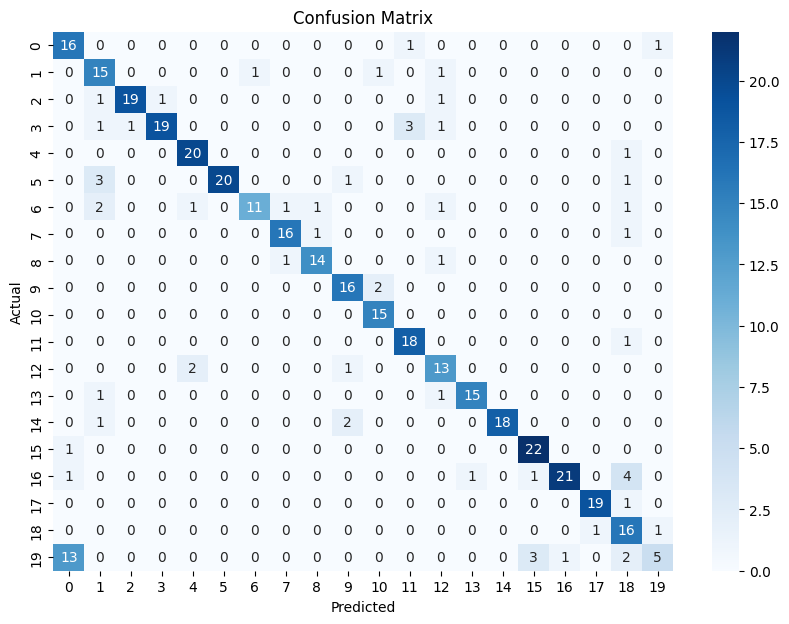

In [74]:
# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<ipython-input-75-aea74b3a2bb3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')


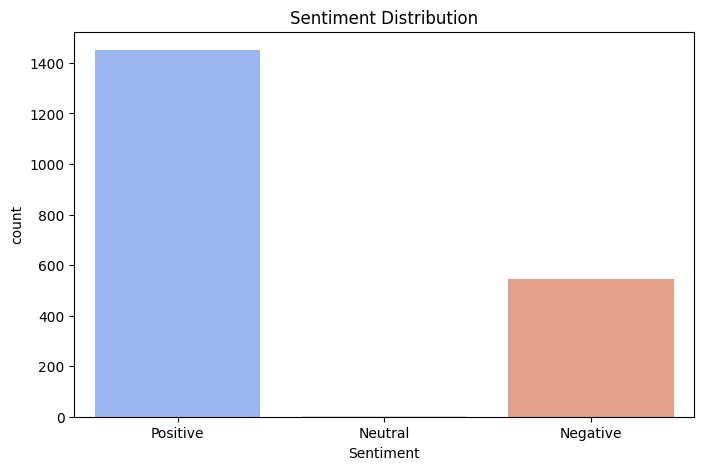

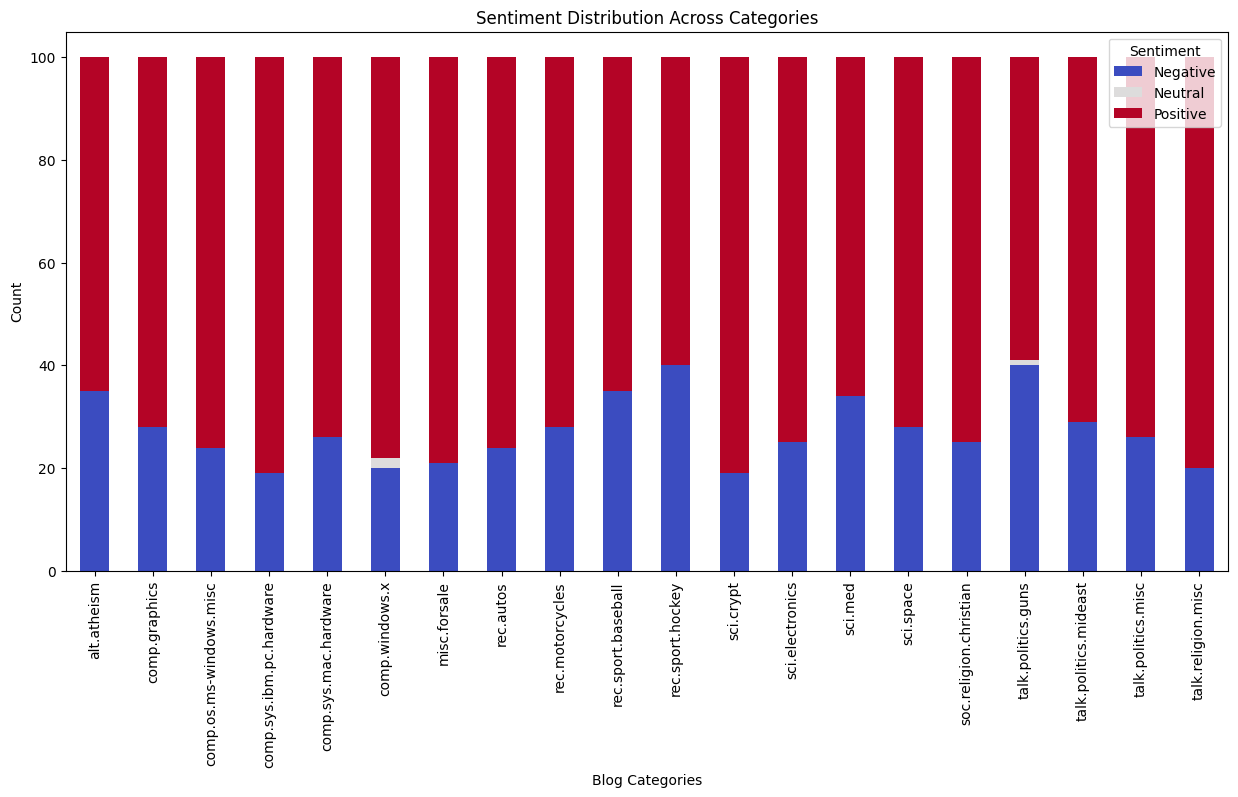

In [75]:
# Sentiment Analysis
def get_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply Sentiment Analysis
data['Sentiment'] = data['Cleaned_Data'].apply(get_sentiment)

# Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=data, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

# Sentiment Analysis per Category
category_sentiment = data.groupby('Labels')['Sentiment'].value_counts().unstack()
category_sentiment.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='coolwarm')
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Blog Categories")
plt.ylabel("Count")
plt.legend(title='Sentiment')
plt.show()
